In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
%matplotlib inline

In [2]:
#Reading data from a csv file
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# Taking only 2 attributes from given data
data = df[['ENGINESIZE','CO2EMISSIONS']]
data.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


In [4]:
# Splitting data into training and testing
mask = np.random.rand(len(df)) < 0.8
train = data[mask]
test = data[~mask]

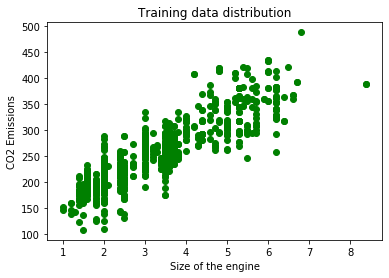

In [5]:
#Training data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'green')
plt.xlabel("Size of the engine")
plt.ylabel("CO2 Emissions")
plt.title("Training data distribution")
plt.show()

In [6]:
#Modeling data using sklearn 
from sklearn import linear_model
simpleregression = linear_model.LinearRegression()
x_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])
simpleregression.fit (x_train,y_train)

#Printing the coefficients

print('Coefficients (thetha1):', simpleregression.coef_)
print('Intercept(theta0):', simpleregression.intercept_)


Coefficients (thetha1): [[39.89846452]]
Intercept(theta0): [123.74798678]


Text(0.5, 1.0, 'Simple regression model')

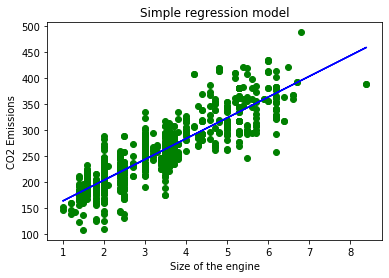

In [7]:
#Plotting the outputs
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'green')
plt.plot(x_train, simpleregression.coef_[0][0]*x_train + simpleregression.intercept_[0], '-b')
plt.xlabel("Size of the engine")
plt.ylabel("CO2 Emissions")
plt.title("Simple regression model")



In [8]:
from sklearn.metrics import r2_score
x_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])
y0_test = simpleregression.predict(x_test)

print("Mean absolute error: %.2f" %np.mean(np.absolute(y0_test-y_test)))
print("Mean Square Error: %.2f" % np.mean((y0_test - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y0_test, y_test))

Mean absolute error: 22.56
Mean Square Error: 885.99
R2-score: 0.72
